<h3> A hands-on Introduction to Data Science - Try it Yourself 5.6 Classification </h3>

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Getting data

In [6]:
df = pd.read_csv("seeds.csv", sep='\t', header=None, random_state = 42)

Analyzing data

In [19]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [20]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


The last column has 3 values for seed classification - 1) Kama 2) Rosa 3) Canadian

Using train-test-split for better testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[[0, 1, 2, 3, 4, 5, 6]], df[[7]], test_size = 0.3)

# Testing for K value of 5
'''
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, np.ravel(y_train))

classifier.predict(X_test)
print(classifier.score(X_test, y_test))
'''
# The k value of 5 yields an accuracy between 87% to 92%.

'\nclassifier = KNeighborsClassifier(n_neighbors = 5)\nclassifier.fit(X_train, np.ravel(y_train))\n\nclassifier.predict(X_test)\nprint(classifier.score(X_test, y_test))\n'

Using k-nearest neighbor model to predict classification of seeds by testing every value of k from 1 to 50

In [9]:
results = []
for k in range(1, 51):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, np.ravel(y_train))
    classifier.predict(X_test)
    
    accuracy = classifier.score(X_test, y_test)
    print("K = ", k)
    print("Accuracy = ", accuracy)
    print("*******************************************************")
    
    results.append([k, accuracy])

K =  1
Accuracy =  0.9365079365079365
*******************************************************
K =  2
Accuracy =  0.873015873015873
*******************************************************
K =  3
Accuracy =  0.873015873015873
*******************************************************
K =  4
Accuracy =  0.873015873015873
*******************************************************
K =  5
Accuracy =  0.9206349206349206
*******************************************************
K =  6
Accuracy =  0.8888888888888888
*******************************************************
K =  7
Accuracy =  0.9365079365079365
*******************************************************
K =  8
Accuracy =  0.9206349206349206
*******************************************************
K =  9
Accuracy =  0.9365079365079365
*******************************************************
K =  10
Accuracy =  0.9047619047619048
*******************************************************
K =  11
Accuracy =  0.8888888888888888
***********************

Adding results into panda DataFrame

In [10]:
results = pd.DataFrame(results, columns = ["k", "accuracy"])

Plotting final results

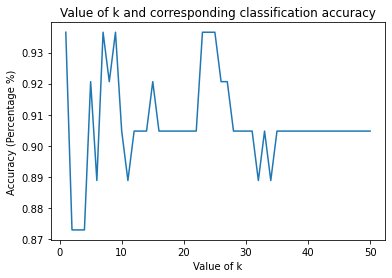

In [11]:
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.xlabel('Value of k')
plt.ylabel('Accuracy (Percentage %)')
plt.show()